In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="UhZ553U4MPZEJP6JuCcM")  # your real key
project = rf.workspace("lakshya-u7efj").project("pothole-ykhai-qsimx")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-1 in yolov8:: 100%|██████████| 2462/2462 [00:00<00:00, 4236.75it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')


100%|██████████| 6.25M/6.25M [00:00<00:00, 279MB/s]


In [ ]:
model.train(
    data=dataset.location + "/data.yaml",
    epochs=25,
    imgsz=416,
    batch=16,
    workers=4,
    name='pothole_detector_v2',
    project='/content/drive/MyDrive/yolo_training'
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_detector_v22, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

train: Scanning /content/Pothole-1/train/labels.cache... 887 images, 0 backgrounds, 0 corrupt: 100%|██████████| 887/887 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 706.5±146.4 MB/s, size: 49.8 KB)



val: Scanning /content/Pothole-1/valid/labels.cache... 213 images, 0 backgrounds, 0 corrupt: 100%|██████████| 213/213 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_training/pothole_detector_v22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/yolo_training/pothole_detector_v22
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.932      2.347      1.595         22        416: 100%|██████████| 56/56 [05:32<00:00,  5.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.42s/it]

                   all        213        693      0.591     0.0646      0.113     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.937      1.883      1.577         39        416: 100%|██████████| 56/56 [05:06<00:00,  5.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.42s/it]

                   all        213        693      0.366      0.353      0.282       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.923      1.811      1.572         53        416: 100%|██████████| 56/56 [05:06<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:24<00:00,  3.55s/it]

                   all        213        693      0.473      0.355      0.335      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.936      1.783      1.578         45        416: 100%|██████████| 56/56 [05:06<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.42s/it]

                   all        213        693      0.457      0.433       0.38      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.905       1.68      1.522         49        416: 100%|██████████| 56/56 [05:07<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.41s/it]

                   all        213        693      0.511       0.46      0.462      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.889      1.662      1.545         33        416: 100%|██████████| 56/56 [05:05<00:00,  5.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.35s/it]

                   all        213        693      0.646       0.48      0.536      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.838      1.612      1.501         41        416: 100%|██████████| 56/56 [05:05<00:00,  5.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.22s/it]

                   all        213        693      0.604      0.514      0.531      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      1.839       1.58      1.494         75        416: 100%|██████████| 56/56 [05:04<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.37s/it]

                   all        213        693      0.547      0.532      0.552      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.792      1.544      1.482         42        416: 100%|██████████| 56/56 [05:03<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.35s/it]

                   all        213        693      0.651      0.509      0.574      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.771      1.523      1.463         38        416: 100%|██████████| 56/56 [05:02<00:00,  5.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.26s/it]

                   all        213        693      0.664      0.554      0.597      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.749      1.488      1.436         41        416: 100%|██████████| 56/56 [04:57<00:00,  5.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.09s/it]

                   all        213        693      0.662       0.47      0.527      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.761      1.485      1.458         42        416: 100%|██████████| 56/56 [04:53<00:00,  5.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.10s/it]

                   all        213        693      0.579      0.528      0.549      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      1.731      1.427      1.415         60        416: 100%|██████████| 56/56 [04:54<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.11s/it]

                   all        213        693      0.671      0.548      0.609      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.734      1.437      1.419         33        416: 100%|██████████| 56/56 [04:56<00:00,  5.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.25s/it]

                   all        213        693      0.638      0.568      0.626      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      1.732      1.415      1.425         35        416: 100%|██████████| 56/56 [04:53<00:00,  5.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.31s/it]

                   all        213        693      0.695      0.588      0.646       0.32


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      1.686      1.432      1.421         23        416: 100%|██████████| 56/56 [04:52<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.36s/it]

                   all        213        693      0.672      0.565       0.61      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G      1.668      1.389      1.402         22        416: 100%|██████████| 56/56 [04:53<00:00,  5.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.31s/it]

                   all        213        693      0.673      0.609      0.647      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G      1.635      1.338      1.379         35        416: 100%|██████████| 56/56 [04:57<00:00,  5.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.35s/it]

                   all        213        693      0.737      0.594      0.657      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G       1.63      1.313      1.383         16        416: 100%|██████████| 56/56 [04:54<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.31s/it]

                   all        213        693      0.718      0.573      0.645      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G      1.592      1.287      1.362         22        416: 100%|██████████| 56/56 [04:55<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.25s/it]

                   all        213        693      0.708      0.574      0.651      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G      1.553      1.232      1.343         15        416: 100%|██████████| 56/56 [04:54<00:00,  5.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.22s/it]

                   all        213        693      0.677      0.606      0.656       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G      1.547      1.201      1.329         15        416: 100%|██████████| 56/56 [04:55<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.20s/it]

                   all        213        693      0.725      0.598      0.672      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G       1.53      1.205      1.333         26        416: 100%|██████████| 56/56 [04:54<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.18s/it]

                   all        213        693      0.705      0.616      0.657      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G      1.514      1.175      1.316         18        416: 100%|██████████| 56/56 [04:55<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.17s/it]

                   all        213        693      0.723      0.632       0.69      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G      1.503      1.159      1.315         35        416: 100%|██████████| 56/56 [04:52<00:00,  5.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.23s/it]

                   all        213        693      0.719      0.616      0.684      0.352



25 epochs completed in 2.247 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_training/pothole_detector_v22/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolo_training/pothole_detector_v22/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolo_training/pothole_detector_v22/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]


                   all        213        693      0.719      0.616      0.684      0.352
Speed: 1.1ms preprocess, 88.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_training/pothole_detector_v22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0c03a137d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from google.colab import files


In [ ]:
!yolo detect train \
  model=yolov8s.pt \
  data={dataset.location + "/data.yaml"} \
  epochs=25 \
  imgsz=416 \
  batch=12 \
  workers=4 \
  name=YOLOv8s_640 \
  project='/content/drive/MyDrive/YOLOv8_Experiments'


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv8s_6403, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

In [ ]:
!ls runs/detect


YOLOv8s_640  YOLOv8s_6402


In [ ]:
!ls -l runs/detect


total 8
drwxr-xr-x 3 root root 4096 Jul  5 07:09 YOLOv8s_640
drwxr-xr-x 3 root root 4096 Jul  5 07:13 YOLOv8s_6402


In [ ]:
!ls -lh runs/detect/YOLOv8s_6402/weights


total 0


In [ ]:
!find runs/detect -type f -name "best.pt"


In [ ]:
!find runs/detect -type f -name "best.pt"

In [ ]:
!cp "/content/drive/MyDrive/YOLOv8_Experiments/YOLOv8s_6403/weights/best.pt" "/content/drive/MyDrive/YOLOv8_Backups/best_final.pt"

cp: cannot create regular file '/content/drive/MyDrive/YOLOv8_Backups/best_final.pt': No such file or directory


In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv8_Backups


In [ ]:
!cp "/content/drive/MyDrive/YOLOv8_Experiments/YOLOv8s_6403/weights/best.pt" "/content/drive/MyDrive/YOLOv8_Backups/best_final.pt"

In [ ]:
!ls -lh /content/drive/MyDrive/YOLOv8_Backups


total 22M
-rw------- 1 root root 22M Jul  5 15:05 best_final.pt


In [ ]:
!ls /content

sample_data


In [ ]:
!find /content/drive/MyDrive -type f -iname "*.jpg" | grep -v labels | head -n 10

find: ‘/content/drive/MyDrive’: No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes006.jpg: 416x320 (no detections), 179.2ms
Speed: 1.5ms preprocess, 179.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 320)
Results saved to runs/detect/predict2


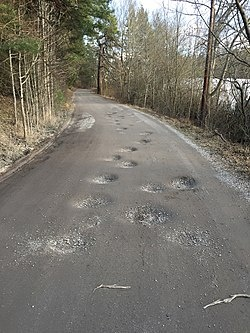


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes009.jpg: 256x416 (no detections), 126.5ms
Speed: 0.9ms preprocess, 126.5ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 416)
Results saved to runs/detect/predict2


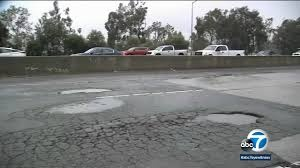


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes001.jpg: 288x416 1 0, 147.1ms
Speed: 1.0ms preprocess, 147.1ms inference, 20.0ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict2


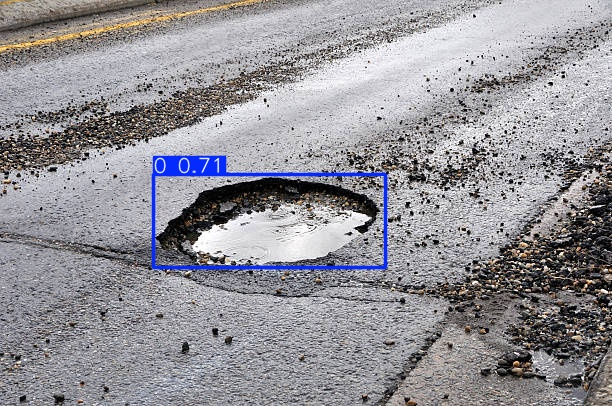


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes002.jpg: 320x416 2 0s, 169.0ms
Speed: 0.9ms preprocess, 169.0ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 416)
Results saved to runs/detect/predict2


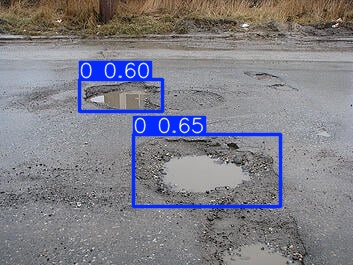


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes007.jpg: 288x416 2 0s, 147.5ms
Speed: 0.9ms preprocess, 147.5ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict2


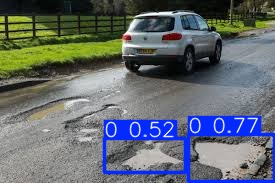


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes003.jpg: 416x320 (no detections), 225.5ms
Speed: 1.2ms preprocess, 225.5ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 320)
Results saved to runs/detect/predict2


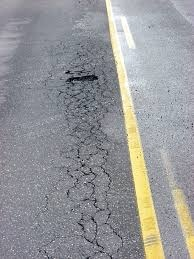


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes005.jpg: 256x416 4 0s, 117.5ms
Speed: 0.9ms preprocess, 117.5ms inference, 4.4ms postprocess per image at shape (1, 3, 256, 416)
Results saved to runs/detect/predict2


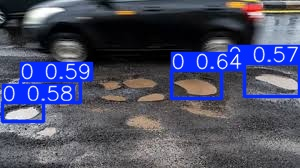


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes008.jpg: 288x416 (no detections), 126.7ms
Speed: 0.9ms preprocess, 126.7ms inference, 0.4ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict2


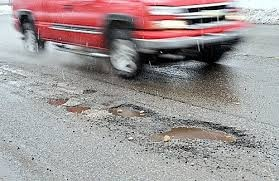


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/Potholes004.jpg: 256x416 10 0s, 110.9ms
Speed: 0.9ms preprocess, 110.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 416)
Results saved to runs/detect/predict2


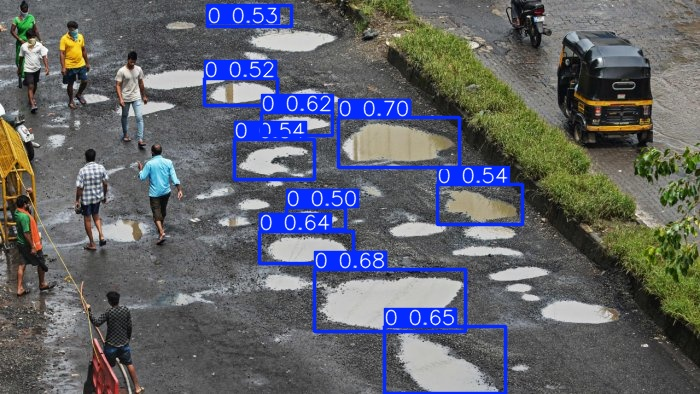


image 1/1 /content/drive/MyDrive/Pothole_Test_Images/potholes2.jpg: 288x416 3 0s, 130.7ms
Speed: 1.0ms preprocess, 130.7ms inference, 0.6ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict2


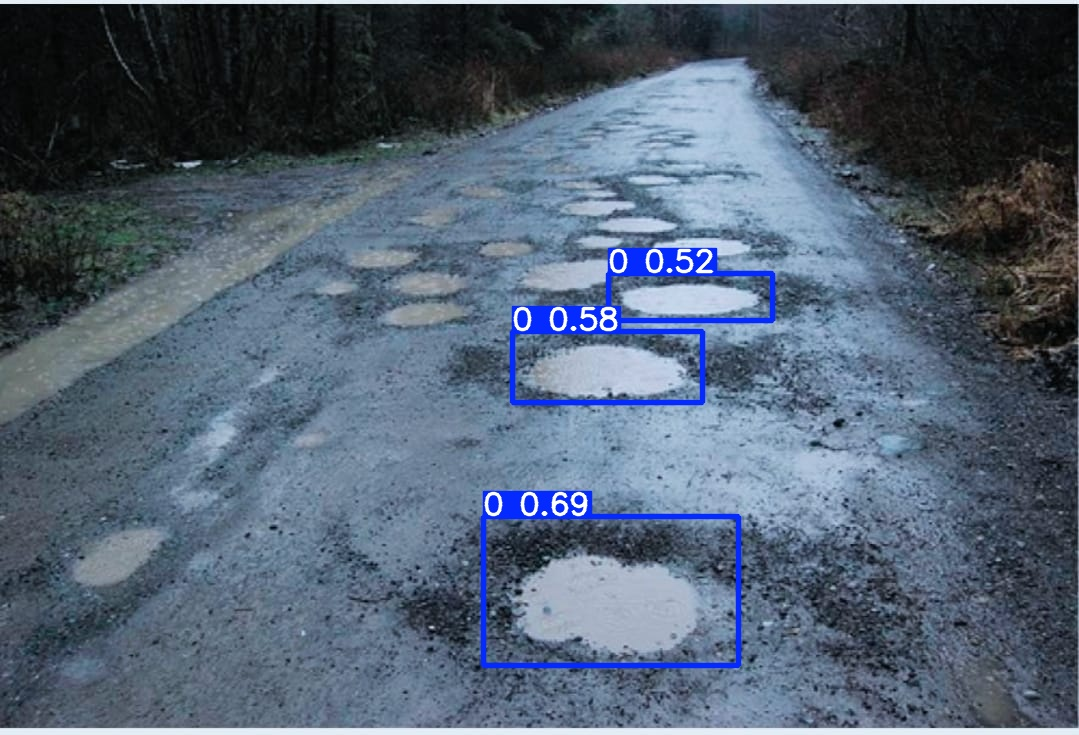

In [ ]:
from ultralytics import YOLO
import os
from PIL import Image

# Load model
model = YOLO("/content/drive/MyDrive/YOLOv8_Backups/best_final.pt")

# Define test image folder
test_folder = "/content/drive/MyDrive/Pothole_Test_Images"

# Run inference on all images
for img_name in os.listdir(test_folder):
    if img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(test_folder, img_name)
        results = model(img_path, imgsz=416, conf=0.5, save=True)
        display(Image.open(results[0].save_dir + '/' + os.path.basename(results[0].path)))

In [5]:
from google.colab import files
files.download("Pothole_Detector.ipynb")
files.download("/content/drive/MyDrive/YOLOv8_Experiment/YOLOv8s_6403/weights/best.pt")

FileNotFoundError: Cannot find file: Pothole_Detector.ipynb